<a href="https://colab.research.google.com/github/naotoo1/MD/blob/main/Try_of_CnnMalaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
from keras.layers import  Input, Lambda, Dense, Flatten
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

Tranfer learning

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

Load the data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
train_path = "/drive/My Drive/malaria_images/Train"
test_path = "/drive/My Drive/malaria_images/Test"
test_path1 = '/content/drive/MyDrive/malaria_images/Test/Parasite'
test_path2 = '/content/drive/MyDrive/malaria_images/Test/Uninfected'

Mounted at /content/drive


Resize- input images

In [ ]:
IMAGE_SIZE = [224,224]

Add preprocessing layer to the front of Inception_rv2

In [ ]:
i_rv2= InceptionResNetV2(input_shape= IMAGE_SIZE+[3], weights='imagenet', include_top=False)

219070464/219055592 [==============================] - 1s 0us/step


Keep the transfered weights

In [ ]:
for layer in i_rv2.layers:
  layer.trainable = False

Get the number of classes

In [ ]:
folders = glob("/content/drive/My Drive/malaria_images/Train/*")
len(folders)

2

Fix the output layers

In [ ]:
from keras.layers import Dropout
x = Flatten()(i_rv2.output)
x = Dropout(0.6)(x)
x = Dense(500, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(250, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

model object instance

In [ ]:
model = Model(inputs=i_rv2.input,outputs=prediction)

Summary of the model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Add loss function and optimization method

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Import images with ImageDataGenerator

In [ ]:
train_imgen= ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_imgen= ImageDataGenerator(rescale=1./255)


In [ ]:
train_set = train_imgen.flow_from_directory('/content/drive/My Drive/malaria_images/Train',
                                            target_size =(224,224),
                                            batch_size= 32,
                                            class_mode='categorical')

test_set = test_imgen.flow_from_directory('/content/drive/My Drive/malaria_images/Test',
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')



Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


Fit the model

In [ ]:
m = model.fit_generator(
    train_set,
    validation_data=test_set,
    epochs=30,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
13/13 [==============================] - 153s 11s/step - loss: 7.8690 - accuracy: 0.6370 - val_loss: 4.4311 - val_accuracy: 0.6940
Epoch 2/30
13/13 [==============================] - 134s 10s/step - loss: 2.6251 - accuracy: 0.7981 - val_loss: 0.6397 - val_accuracy: 0.9179
Epoch 3/30
13/13 [==============================] - 134s 10s/step - loss: 1.3971 - accuracy: 0.8606 - val_loss: 0.2934 - val_accuracy: 0.9403
Epoch 4/30
13/13 [==============================] - 133s 10s/step - loss: 0.6668 - accuracy: 0.8942 - val_loss: 0.3366 - val_accuracy: 0.9104
Epoch 5/30
13/13 [==============================] - 134s 10s/step - loss: 0.4827 - accuracy: 0.9135 - val_loss: 0.5595 - val_accuracy: 0.9030
Epoch 6/30
13/13 [==============================] - 133s 10s/step - loss: 0.5225 - accuracy: 0.9231 - val_loss: 0.6041 - val_accuracy: 0.8955
Epoch 7/30
13/13 [==============================] - 134s 11s/step - loss: 0.5201 - accuracy: 0.8942 - val_loss: 0.5111 - val_accuracy: 0.8881
Epoch 

Loss function

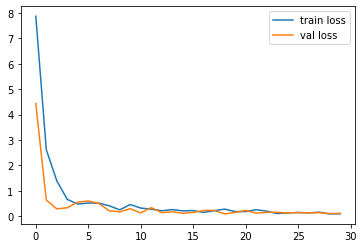

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(m.history['loss'],label='train loss')
plt.plot(m.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

Accuracies

In [ ]:
print(m.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


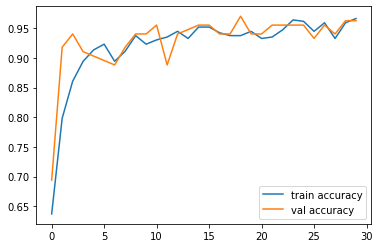

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(m.history['accuracy'], label='train accuracy')
plt.plot(m.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Save the model

In [ ]:
from keras.models import load_model
model.save('model14.h5')

Load the model

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/malaria_prototypes/Parasite/model14.h5')

Make prediction on the test set

In [ ]:
pred = model.predict(test_set)
pred = np.argmax(pred,axis=1)
pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

Load some sample test images

In [ ]:
from keras.preprocessing import image

In [ ]:
img1 = image.load_img('/content/drive/MyDrive/malaria_prototypes/Parasite/C133P94ThinF_IMG_20151004_155721_cell_124.png',
                     target_size=(224,224))

img2 = image.load_img('/content/drive/MyDrive/malaria_prototypes/Uninfected/C1_thinF_IMG_20150604_104722_cell_211.png',
                     target_size=(224,224))


Make some transformations

In [ ]:
x = image.img_to_array(img1)
x = x/255

In [ ]:
from keras.applications.imagenet_utils import preprocess_input
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

Get Prediction with confidence/Recall

In [ ]:
pred1= np.argmax(model.predict(img_data),axis=1)
if pred1==1:
  print(f'Uninfected with {np.max(model.predict(img_data))*100} % confidence')
else:
  print(f'Infected with {np.max(model.predict(img_data))*100} % confidence')

Infected with 100.0 % confidence
